In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [62]:
data = pd.read_excel(r'data.xls')
data

,用户序号,x,y
0,1,679,0.790
1,2,292,0.440
2,3,1012,0.560
3,4,493,0.779
4,5,582,2.700
5,6,1156,3.640
6,7,997,4.730
7,8,2189,9.500
8,9,1097,5.340
9,10,2078,6.850


In [63]:
data.corr()

,用户序号,x,y
用户序号,1.000000,0.173230,0.159023
x,0.173230,1.000000,0.834399
y,0.159023,0.834399,1.000000


In [64]:
    x = sm.add_constant(data.iloc[:,1]) #生成自变量
    # x = data['x']
    y = data['y'] #生成因变量
    model = sm.OLS(y, x) #生成模型
    result = model.fit() #模型拟合
    result.summary() #模型描述


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           8.44e-15
Time:                        20:53:00   Log-Likelihood:                -99.080
No. Observations:                  53   AIC:                             202.2
Df Residuals:                      51   BIC:                             206.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7601      0.444     -1.711      0.093      -1.652       0.132
x              0.0036      0.000     10.811      0.000       0.003       0.004
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.164
Skew:                          -0.130   Prob(JB):                        0.921
Kurtosis:                       2.920   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
w**(-2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

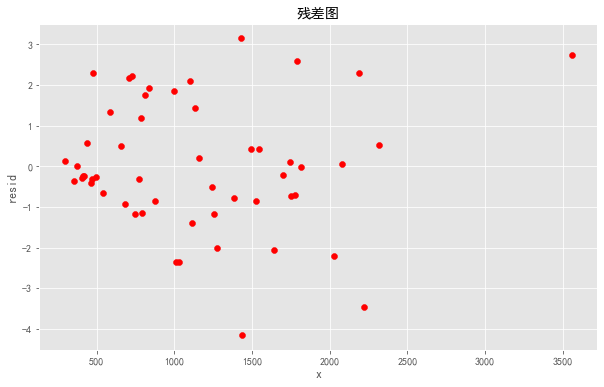

In [66]:
sig = list(result.resid)
xx = list(data.iloc[:,1])

# 设置绘图风格
plt. style.use("ggplot")
# 设置中文编码和符号的正常显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# 设置图框的大小
fig = plt.figure(figsize = (10,6))
# 绘图
plt.scatter(xx, # x轴数据
            sig, # y轴数据
            c='red') 
# 添加标题和坐标轴标签
plt.title('残差图')
plt.xlabel('x')
plt.ylabel('resid')

plt.savefig('res.png')
# 显示图形
plt.show()



In [68]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

sm.stats.diagnostic.het_white(model.resid, exog = model.model.exog)

[('Lagrange multiplier statistic', 6.334008062645265),
 ('p-value', 0.011844434081613621),
 ('f-value', 6.922266039658079),
 ('f p-value', 0.011230719809139865)]

In [71]:
w0 = np.array(xx)

model = []
Log_likehood = {}
for i in range(-4,5): 
    model.append(sm.WLS(y, x, weights=w0**(i*0.5)).fit())
    m = str(i*0.5)
    Log_likehood[m] = model[i+4].llf

Log_likehood



{'-2.0': -95.83341494835537,
 '-1.5': -94.32170436040428,
 '-1.0': -94.33361361148387,
 '-0.5': -95.94305687070089,
 '0.0': -99.08042122802837,
 '0.5': -103.51157439626273,
 '1.0': -108.90346151039418,
 '1.5': -114.95608216430264,
 '2.0': -121.50001207422127}

In [72]:
model[1].summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            WLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     83.51
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.54e-12
Time:                        20:56:00   Log-Likelihood:                -94.322
No. Observations:                  53   AIC:                             192.6
Df Residuals:                      51   BIC:                             196.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5510      0.311     -1.774      0.082      -1.175       0.072
x              0.0035      0.000      9.138      0.000       0.003       0.004
==============================================================================
Omnibus:                        1.978   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.898
Skew:                           0.435   Prob(JB):                        0.387
Kurtosis:                       2.680   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model[1].

In [77]:
x = sm.add_constant(data.iloc[:,1])
y = data['y'] #生成因变量
y1 = np.array(y)
y1 = y1**0.5
model1 = sm.OLS(y1, x) #生成模型
result1 = model1.fit() #模型拟合
result1.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     89.90
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           7.67e-13
Time:                        21:02:14   Log-Likelihood:                -34.274
No. Observations:                  53   AIC:                             72.55
Df Residuals:                      51   BIC:                             76.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6027      0.131      4.609      0.000       0.340       0.865
x              0.0009    9.9e-05      9.482      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.494
Skew:                          -0.229   Prob(JB):                        0.781
Kurtosis:                       3.116   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

data0 = mean_norm(data)
data0

,y,x1,x2,x3
0,-1.647443,-0.067439,-1.649972,-1.376599
1,0.656673,1.056543,-0.122220,0.072453
2,-0.495385,-1.191421,-0.122220,-0.341562
3,0.771879,0.831747,0.488881,0.693475
4,0.195850,0.382154,-0.733321,-1.169592
5,-0.264973,-0.517032,1.405531,-0.859080
6,1.002291,1.730932,0.488881,1.728511
7,-1.647443,-0.966624,-1.344421,-0.341562
8,1.002291,-0.067439,1.099981,0.900482
9,0.426261,-1.191421,0.488881,0.693475


In [31]:
x = sm.add_constant(data0.iloc[:,1:]) #生成自变量
y = data0['y'] #生成因变量
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

D:\py\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8.283
Date:                Thu, 24 Mar 2022   Prob (F-statistic):             0.0149
Time:                        21:48:40   Log-Likelihood:                -5.4758
No. Observations:                  10   AIC:                             18.95
Df Residuals:                       6   BIC:                             20.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.171  -4.88e-16      1.000      -0.418       0.418
x1             0.3848      0.198      1.942      0.100      -0.100       0.870
x2             0.5355      0.217      2.465      0.049       0.004       1.067
x3             0.2771      0.235      1.178      0.284      -0.299       0.853
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.562
Skew:                           0.216   Prob(JB):                        0.755
Kurtosis:                       1.922   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""